In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [147]:
item=pd.read_csv("items.csv")

In [148]:
itemcat=pd.read_csv("item_categories.csv")
shop=pd.read_csv("shops.csv")
train=pd.read_csv('sales_train.csv')
test=pd.read_csv("test.csv")

In [149]:
def sales(dataframe):
    df=dataframe
    print('About datatypes of columns and memory usage:')
    df.info()
    print('Shape of data frame:')
    print(df.shape)
    for col in df.columns:
        print("Unique number of values in ")
        print(col)
        print(df.loc[:,col].nunique())
    print("number of null values present in each column")
    print(df.isnull().sum())
    print(df.head(3))

In [191]:
sales(train)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   shop_id       int64  
 2   item_id       int64  
 3   item_price    float64
 4   item_cnt_day  float64
 5   Revenues      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 134.4+ MB
Shape of data frame:
(2935849, 6)
Unique number of values in 
date
36
Unique number of values in 
shop_id
60
Unique number of values in 
item_id
21807
Unique number of values in 
item_price
19993
Unique number of values in 
item_cnt_day
198
Unique number of values in 
Revenues
24771
number of null values present in each column
date            0
shop_id         0
item_id         0
item_price      0
item_cnt_day    0
Revenues        0
dtype: int64
      date  shop_id  item_id  item_price  item_cnt_day  Revenues
0  2013-02       59    22154       999.0        

In [192]:
sales(test)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
Shape of data frame:
(214200, 3)
Unique number of values in 
ID
214200
Unique number of values in 
shop_id
42
Unique number of values in 
item_id
5100
number of null values present in each column
ID         0
shop_id    0
item_id    0
dtype: int64
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233


In [194]:
sales(shop)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
Shape of data frame:
(60, 2)
Unique number of values in 
shop_name
60
Unique number of values in 
shop_id
60
number of null values present in each column
shop_name    0
shop_id      0
dtype: int64
                       shop_name  shop_id
0  !Якутск Орджоникидзе, 56 фран        0
1  !Якутск ТЦ "Центральный" фран        1
2               Адыгея ТЦ "Мега"        2


In [150]:
train.head()
Id = test['ID']
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [151]:
test.shape

(214200, 3)

In [152]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [154]:
train['date'] = pd.to_datetime(train['date'])

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [156]:
train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [157]:
train['date'] = train['date'].apply(lambda x: x.strftime("%Y-%m"))

In [158]:
train.head().sort_values(by = 'date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,2013-01,0,25,2555,1099.00,1.0
0,2013-02,0,59,22154,999.00,1.0
1,2013-03,0,25,2552,899.00,1.0
2,2013-05,0,25,2552,899.00,-1.0
3,2013-06,0,25,2554,1709.05,1.0


In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [160]:
#train.drop(['date_block_num','item_price'] , axis =1, inplace= True)

In [161]:
train.head().sort_values(by = 'date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,2013-01,0,25,2555,1099.00,1.0
0,2013-02,0,59,22154,999.00,1.0
1,2013-03,0,25,2552,899.00,1.0
2,2013-05,0,25,2552,899.00,-1.0
3,2013-06,0,25,2554,1709.05,1.0


<AxesSubplot:xlabel='date'>

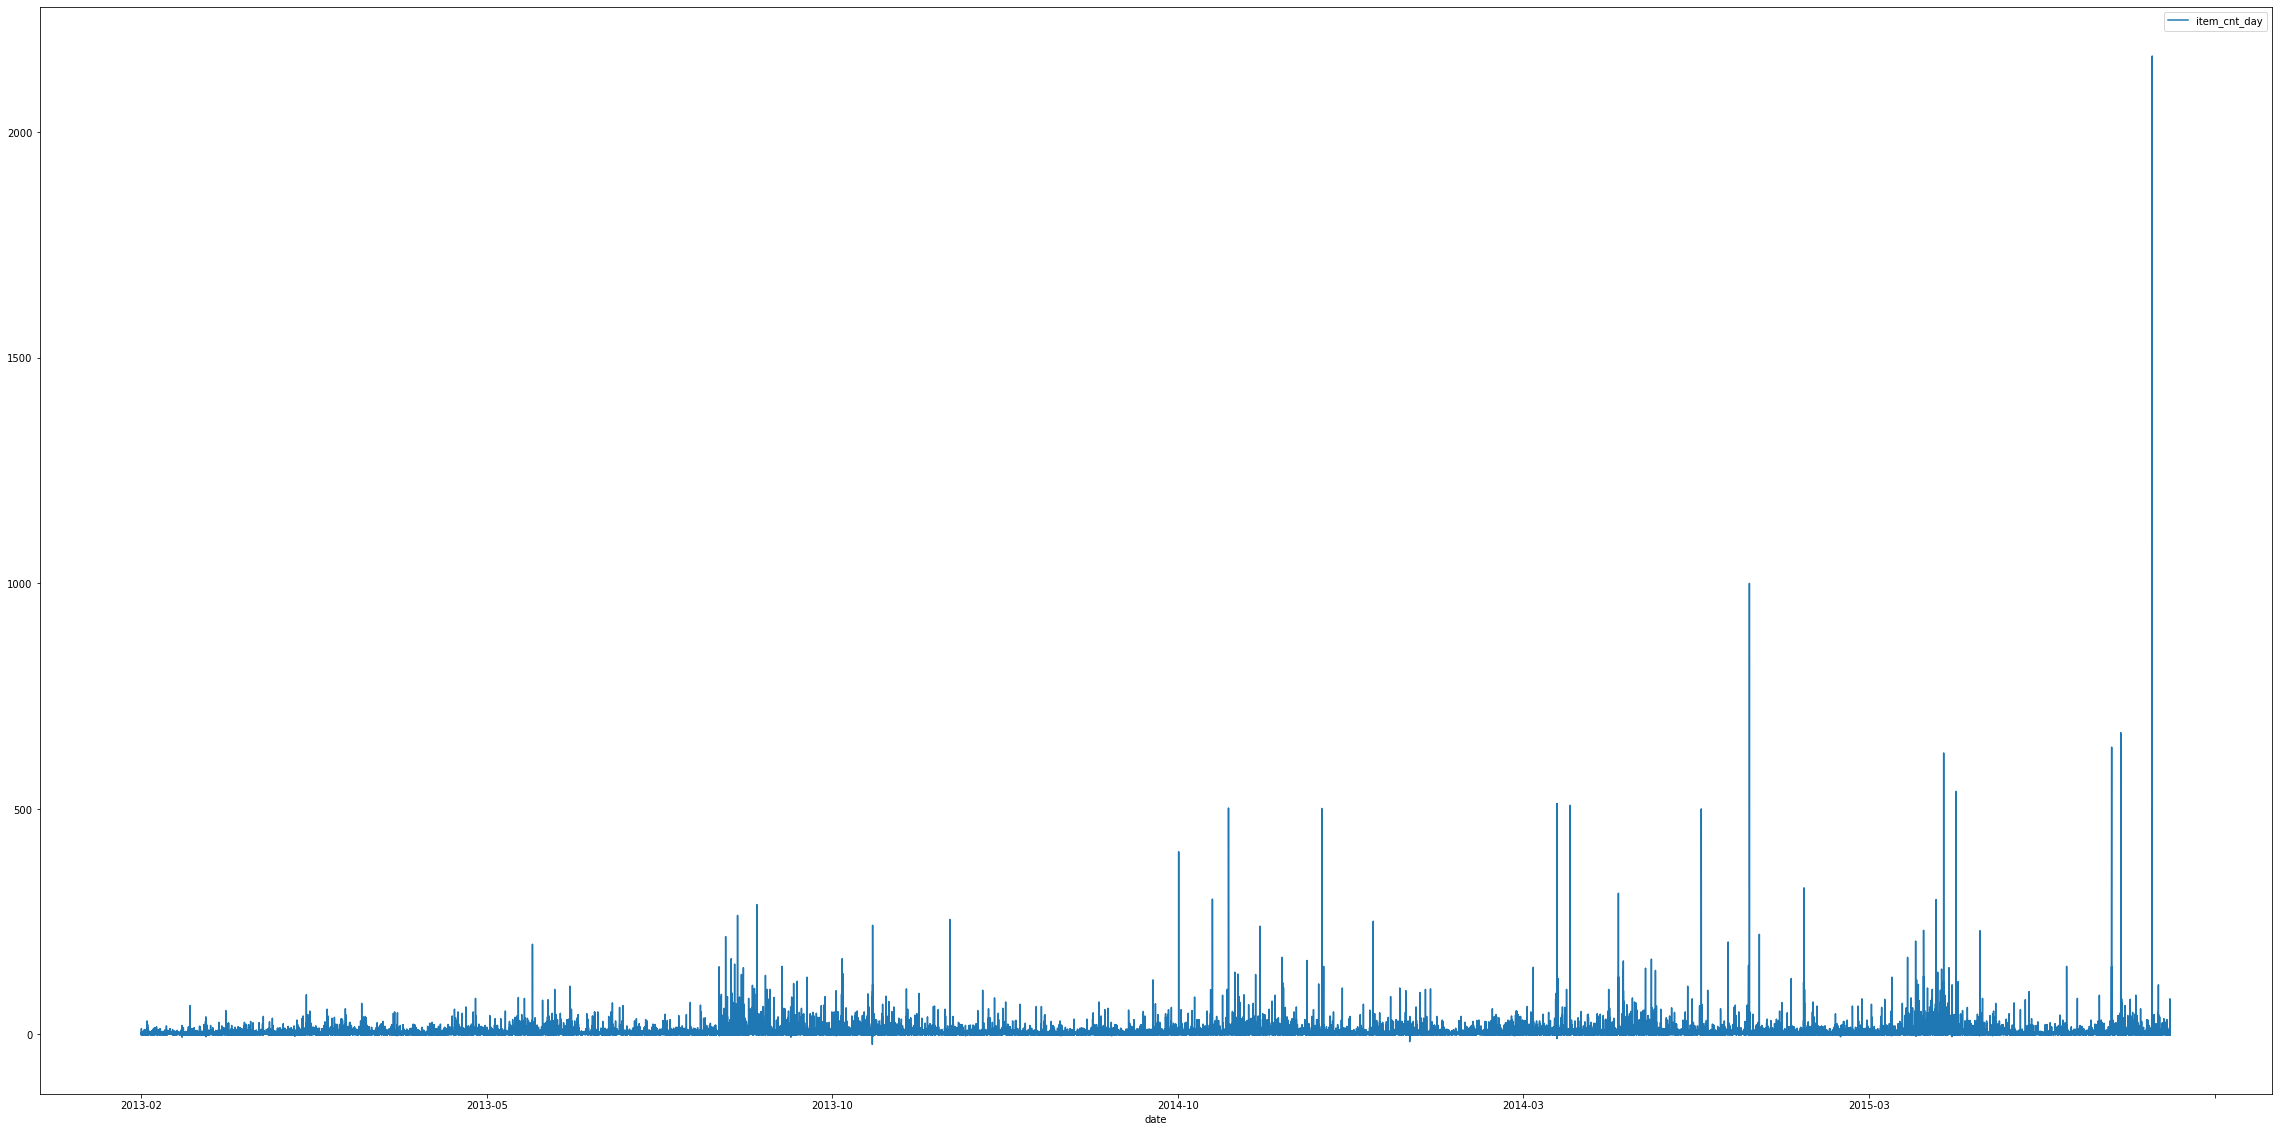

In [162]:
train.plot(x='date',y='item_cnt_day',figsize= (40,20))

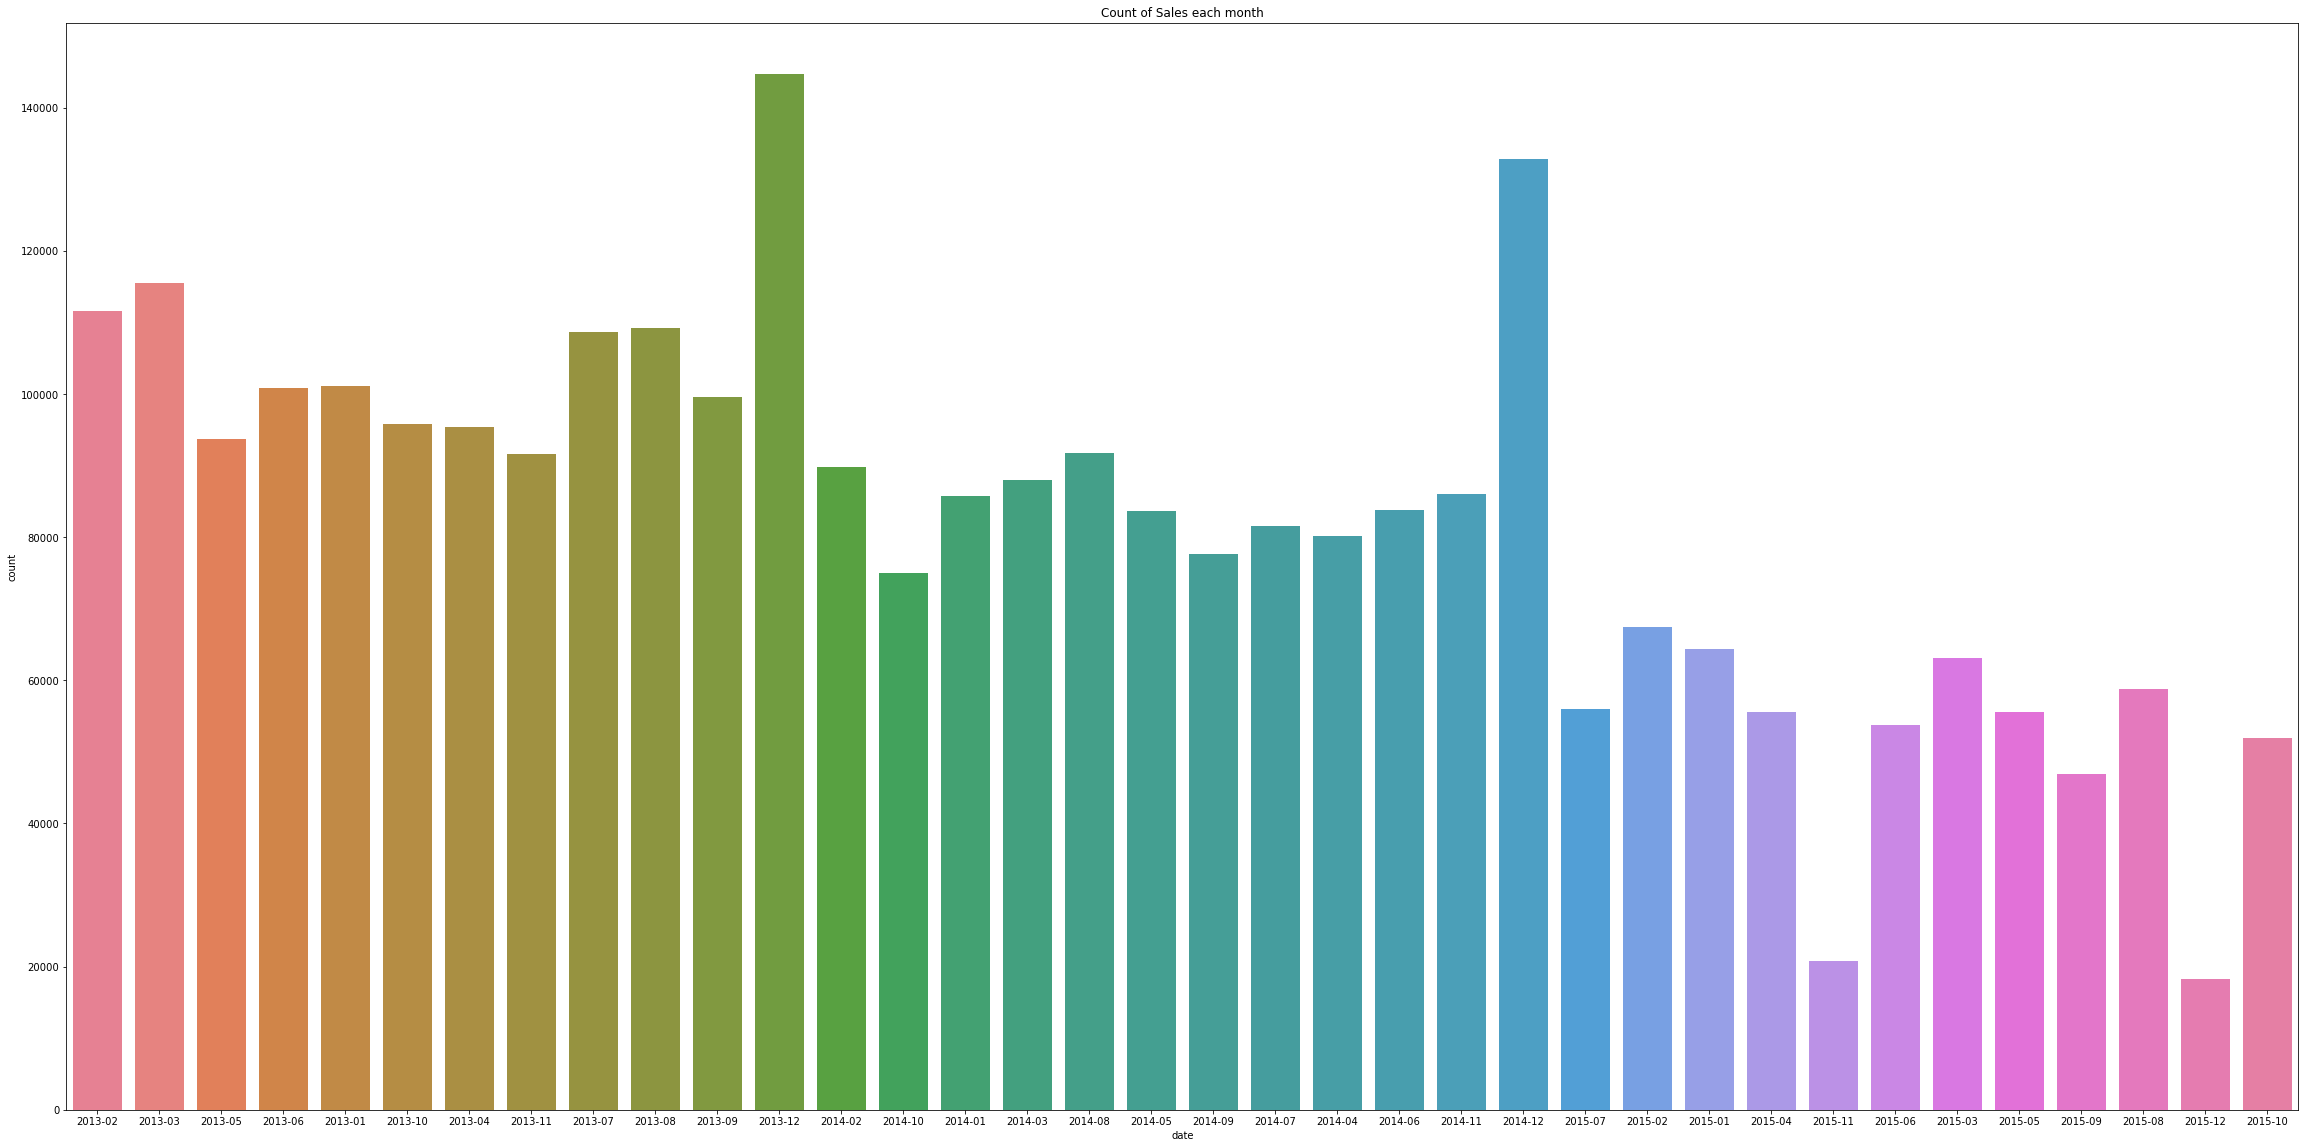

In [163]:
plt.figure(figsize=(40,20))
ax = sns.countplot(x="date", data=train, palette="husl")
plt.title("Count of Sales each month")
plt.show()

In [164]:
print("There are", train['shop_id'].nunique(), "unique shops.")
print("There are", train['item_id'].nunique(), "unique items")

There are 60 unique shops.
There are 21807 unique items


In [165]:
train['Revenues'] = train['item_cnt_day']*train['item_price']

In [166]:
train[["shop_id","item_id","date","item_cnt_day","Revenues","item_price"]].groupby(["shop_id","item_id"])\
            .agg({"date":["min",'max'],"item_cnt_day":"sum","item_price":"mean","Revenues":"sum"})

date          item_cnt_day item_price Revenues
                     min      max          sum       mean      sum
shop_id item_id                                                   
0       30       2013-02  2013-02         31.0    265.000   8215.0
        31       2013-02  2013-02         11.0    434.000   4774.0
        32       2013-01  2013-12         16.0    221.000   3536.0
        33       2013-01  2013-07          6.0    347.000   2082.0
        35       2013-01  2013-10         15.0    247.000   3705.0
...                  ...      ...          ...        ...      ...
59      22154    2013-02  2013-02          1.0    999.000    999.0
        22155    2013-11  2013-11          1.0    149.000    149.0
        22162    2015-01  2015-11         16.0    389.625   6234.0
        22164    2015-02  2015-11          6.0    724.000   4344.0
        22167    2013-03  2014-06          4.0    299.000   1196.0

[424124 rows x 5 columns]

In [167]:
train.drop(['date_block_num'] , axis =1, inplace= True)

In [168]:
data = train.groupby(['date','shop_id','item_id','item_price']).sum()
data

item_cnt_day  Revenues
date    shop_id item_id item_price                        
2013-01 0       32      221.0                4.0     884.0
                33      347.0                2.0     694.0
                35      247.0                2.0     494.0
                43      221.0                1.0     221.0
                51      127.0                1.0     127.0
...                                          ...       ...
2015-12 59      21421   19.0                 1.0      19.0
                21669   299.0                1.0     299.0
                21872   148.0                1.0     148.0
                21968   949.0               -1.0    -949.0
                22088   119.0                2.0     238.0

[1986648 rows x 2 columns]

In [169]:
data = train.pivot_table(index=['shop_id','item_id','item_price',"Revenues"], columns='date', values='item_cnt_day', fill_value=0)
data.reset_index(inplace=True)
data.head()

date,shop_id,item_id,item_price,Revenues,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,30,265.0,530.0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,30,265.0,795.0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,30,265.0,1060.0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,30,265.0,2385.0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,31,434.0,434.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
data = train.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
data.reset_index(inplace=True)
data.head()

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,30,0.000000,3.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.000000,1.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,1.333333,1.500000,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.000000,1.200000,0.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
test_data = pd.merge(test, data, on=['shop_id','item_id'], how='left')
test_data.drop(['ID', '2013-01'], axis=1, inplace=True)
test_data = test_data.fillna(0)

In [172]:
test_data.head()

,shop_id,item_id,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

In [174]:
Y = data['2015-10'].values
X = data.drop(['2015-10'], axis = 1)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [176]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(339299, 37)
(339299,)
(84825, 37)
(84825,)


In [177]:
print(y_train)

[0. 0. 1. ... 0. 0. 0.]


In [178]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, lr.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, lr.predict(X_test)))
print('Train set score:', lr.score(X_train,y_train))

Train set mse: 0.16787448603179816
Test set mse: 0.39908049557834446
Train set score: 0.8313997296561091


In [180]:
rndm_forst = RandomForestRegressor(n_estimators = 60)
rndm_forst.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, rndm_forst.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, rndm_forst.predict(X_test)))
print('Train set score:', rndm_forst.score(X_train,y_train))

Train set mse: 0.08170750554061303
Test set mse: 0.3622011308136565
Train set score: 0.917939242294014


In [190]:
grad_boost = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 65, random_state = 42)
grad_boost.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, grad_boost.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, grad_boost.predict(X_test)))
print('Train set score:', grad_boost.score(X_train,y_train))

Train set mse: 0.09089045515347752
Test set mse: 0.38115653439197433
Train set score: 0.9087165913487714


In [181]:
prediction = rndm_forst.predict(test_data)

In [182]:
prediction = list(map(round, prediction))

In [212]:
submission=pd.read_csv('sample_submission.csv')
print(submission.shape)
submission.head()

(214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [217]:
submission['item_cnt_month'] = prediction
#submission.to_csv('prediction.csv', index=False)
submission = pd.merge(test, submission, on=['ID'], how='left')
submission.head()

,ID,shop_id_x,item_id_x,shop_id_y,item_id_y,item_cnt_month
0,0,5,5037,5,5037,0
1,1,5,5320,5,5320,1
2,2,5,5233,5,5233,0
3,3,5,5232,5,5232,0
4,4,5,5268,5,5268,1


In [218]:
print(prediction)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 

<AxesSubplot:xlabel='ID'>

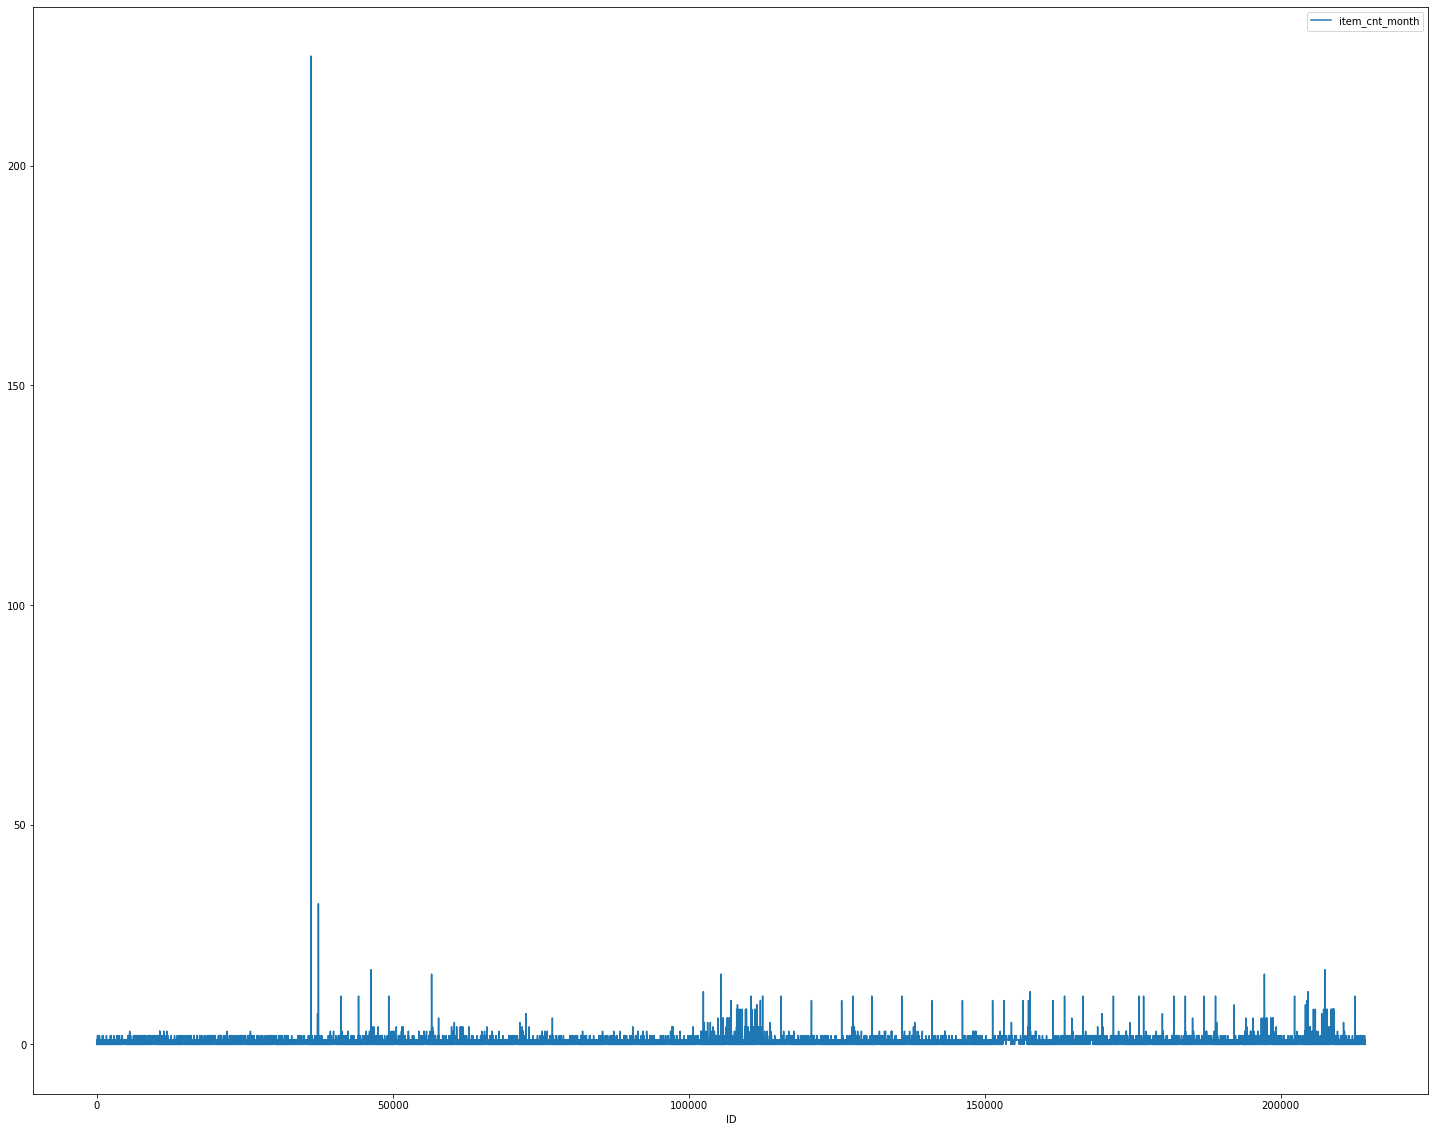

In [219]:
submission.plot(x='ID',y='item_cnt_month',figsize= (25,20))